# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [8]:
!pip3 install -U wbdata

In [9]:
In [1]: import wbdata

In [2]: wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [40]:
In [3]: wbdata.get_indicators(source=25)

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------
BM.KLT.DINV.WD.GD.ZS  Foreign direct investment, net outflows (% of GDP)
BM.TRF.PWKR.CD.DT     Personal remittances, paid (current US$)
BX.KLT.DINV.WD.GD.ZS  Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.CD        Personal transfers, receipts (BoP, current US$)
CM.MKT.LCAP.GD.ZS     Market capitalization of listed domestic companies (% of GDP)
EG.ELC.ACCS.ZS        Access to electricity (% of population)
EG.USE.ELEC.KH.PC     Electric power consumption (kWh per capita)
EN.POP.DNST           Population density (people per sq. km of land area)
FB.ATM.TOTL.P5        Automated teller machines (ATMs) (per 100,000 adults)
FB.CBK.BRWR.P3        Borrowers from commercial banks (per 1,000 adults)
FP.CPI.TOTL           Consumer price index (2010 = 100)
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
FS.AST.DO

In [13]:
import wbdata
import pandas as pd

indicadores = {
    "SL.AGR.EMPL.FE.ZS": "Empleo femenino en agricultura (% del empleo femenino)",
    "SL.AGR.EMPL.MA.ZS": "Empleo masculino en agricultura (% del empleo masculino)"
}
paises = ["USA", "ARG"]

# Obtener todos los datos disponibles
datos = wbdata.get_dataframe(indicadores, country=paises)

# Resetear el índice para facilitar el filtrado
datos.reset_index(inplace=True)

# Convertir la columna 'date' a string
datos['date'] = datos['date'].astype(str)

# Filtrar para los años 2020 y 2023
datos_2020 = datos[datos['date'] == '2020']
datos_2023 = datos[datos['date'] == '2023']

# Combinar los resultados
datos_final = pd.concat([datos_2020, datos_2023])

# Imprimir los datos filtrados
print(datos_final)

# Explicación de los indicadores
print("\nExplicación de los indicadores:")
print("Empleo femenino en agricultura (% del empleo femenino): Porcentaje de mujeres empleadas en el sector agrícola en relación con el empleo femenino total.")
print("Empleo masculino en agricultura (% del empleo masculino): Porcentaje de hombres empleados en el sector agrícola en relación con el empleo masculino total.")

# Explicación de los números
print("\nExplicación de los números:")
print("Los números que se muestran para los indicadores representan porcentajes.")
print("Por ejemplo, si ves un valor de 10.5 para el 'Empleo femenino en agricultura (% del empleo femenino)' en Argentina en 2020,")
print("esto significa que el 10.5% de todas las mujeres empleadas en Argentina en 2020 trabajaban en el sector agrícola.")
print("De manera similar, si ves un valor de 15.2 para el 'Empleo masculino en agricultura (% del empleo masculino)' en Estados Unidos en 2023,")
print("esto significa que el 15.2% de todos los hombres empleadas en Estados Unidos en 2023 trabajaban en el sector agrícola.")

# Consideraciones importantes
print("\nConsideraciones importantes:")
print("Los datos de empleo pueden variar según las definiciones y metodologías utilizadas por la Organización Internacional del Trabajo (OIT).")
print("Es muy probable que los datos del 2023 no estén completos.")
print("Es posible que los datos de algunos años no estén disponibles.")

          country  date  \
3       Argentina  2020   
67  United States  2020   
0       Argentina  2023   
64  United States  2023   

    Empleo femenino en agricultura (% del empleo femenino)  \
3                                            0.278811        
67                                           1.031997        
0                                            0.376611        
64                                           0.986814        

    Empleo masculino en agricultura (% del empleo masculino)  
3                                            0.840335         
67                                           2.332137         
0                                            0.790740         
64                                           2.059250         

Explicación de los indicadores:
Empleo femenino en agricultura (% del empleo femenino): Porcentaje de mujeres empleadas en el sector agrícola en relación con el empleo femenino total.
Empleo masculino en agricultura (% del empleo masculi

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [15]:
# Estadísticas descriptivas
# Calcular estadísticas descriptivas
estadisticas = datos_final.groupby(['country', 'date']).describe()

# Imprimir las estadísticas
print(estadisticas)


                   Empleo femenino en agricultura (% del empleo femenino)  \
                                                                    count   
country       date                                                          
Argentina     2020                                                1.0       
              2023                                                1.0       
United States 2020                                                1.0       
              2023                                                1.0       

                                                                          \
                        mean std       min       25%       50%       75%   
country       date                                                         
Argentina     2020  0.278811 NaN  0.278811  0.278811  0.278811  0.278811   
              2023  0.376611 NaN  0.376611  0.376611  0.376611  0.376611   
United States 2020  1.031997 NaN  1.031997  1.031997  1.031997  1.031997   
    

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [37]:
import matplotlib.pyplot as plt


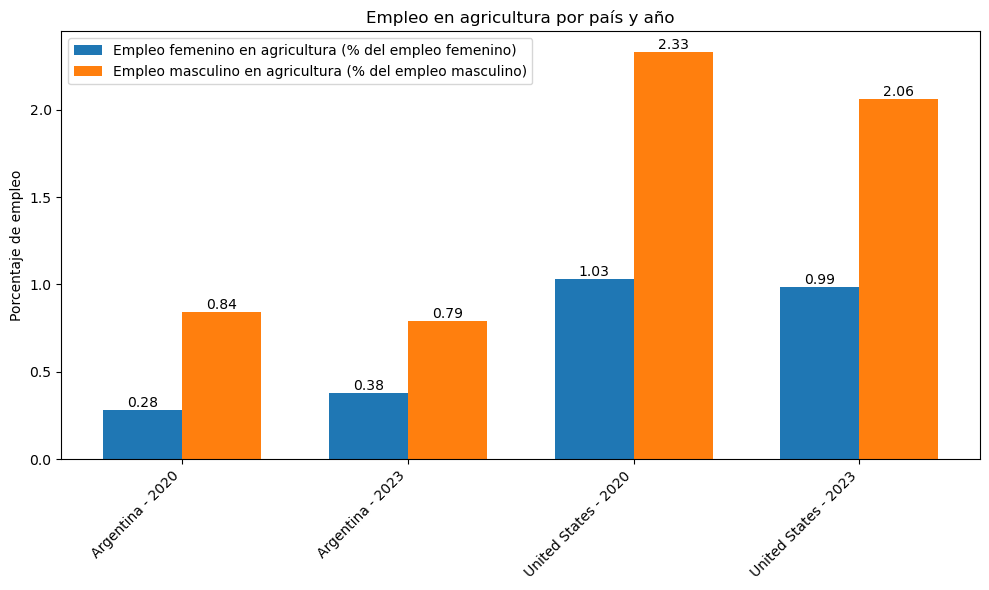

In [38]:
plt.figure(figsize=(10, 6))

# Datos para el gráfico
paises = datos_final['country'].unique()
anios = datos_final['date'].unique()
indicadores = ["Empleo femenino en agricultura (% del empleo femenino)", "Empleo masculino en agricultura (% del empleo masculino)"]

# Posiciones de las barras
x = range(len(paises) * len(anios))
ancho_barra = 0.35

# Crear barras y etiquetas para cada indicador
for i, indicador in enumerate(indicadores):
    valores = []
    for pais in paises:
        for anio in anios:
            datos_anio_pais = datos_final[(datos_final['country'] == pais) & (datos_final['date'] == anio)]
            if not datos_anio_pais.empty:
                valor = datos_anio_pais[indicador].values[0]
                valores.append(valor)
            else:
                valores.append(0)  # Usar 0 si no hay datos disponibles
    barras = plt.bar([pos + i * ancho_barra for pos in x], valores, width=ancho_barra, label=indicador)
    plt.bar_label(barras, fmt='%.2f')  # Añadir etiquetas con los valores

# Etiquetas y título
plt.xticks([pos + ancho_barra / 2 for pos in x], [f"{pais} - {anio}" for pais in paises for anio in anios], rotation=45, ha='right')
plt.ylabel("Porcentaje de empleo")
plt.title("Empleo en agricultura por país y año")
plt.legend()
plt.tight_layout()
plt.show()

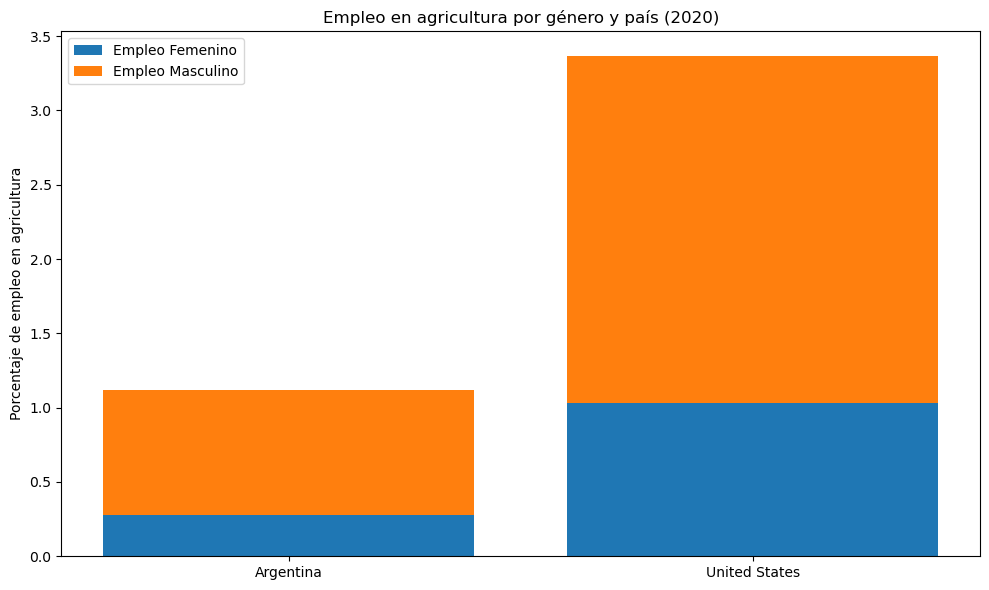

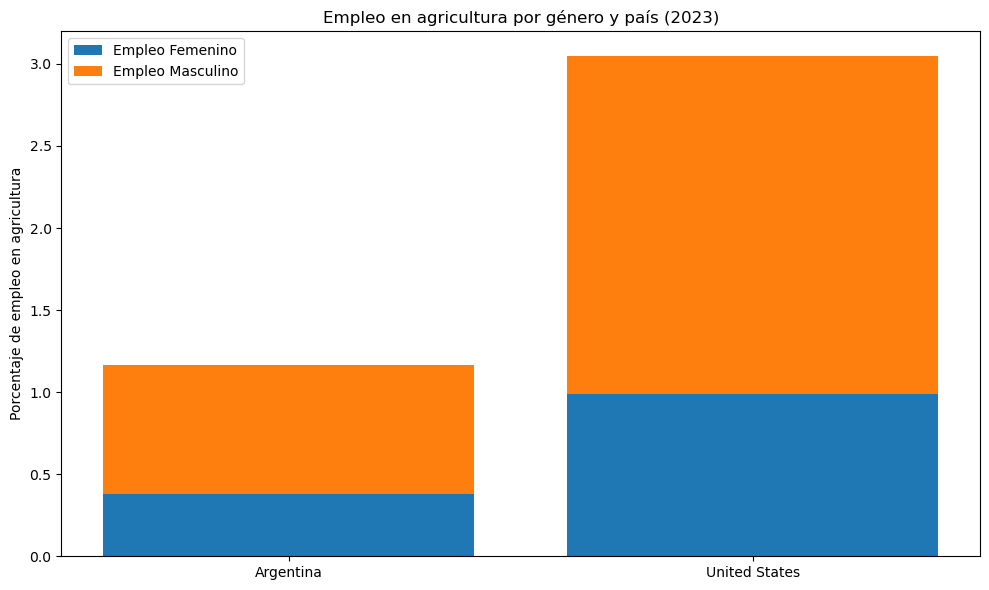

In [67]:
# Resolver acá estilo 
def crear_graficos_acumulados_empleo_agricultura(datos_final):
    """
    Crea gráficos de barras comparativos acumulados para mostrar el empleo en agricultura.

    Args:
        datos_final (DataFrame): DataFrame con los datos de empleo.
    """

    paises = datos_final['country'].unique()
    anios = datos_final['date'].unique()

    for anio in anios:
        fig, ax = plt.subplots(figsize=(10, 6))
        
        datos_anio = datos_final[datos_final['date'] == anio]
        
        # Preparar los datos para el gráfico de barras acumuladas
        femenino = datos_anio['Empleo femenino en agricultura (% del empleo femenino)'].values
        masculino = datos_anio['Empleo masculino en agricultura (% del empleo masculino)'].values
        
        ax.bar(paises, femenino, label='Empleo Femenino')
        ax.bar(paises, masculino, bottom=femenino, label='Empleo Masculino')
        
        ax.set_ylabel('Porcentaje de empleo en agricultura')
        ax.set_title(f'Empleo en agricultura por género y país ({anio})')
        ax.legend()
        plt.tight_layout()
        plt.show()

# Ejemplo de cómo llamar a la función (asumiendo que 'datos_final' es tu DataFrame)
data = {'country': ['Argentina', 'Argentina', 'United States', 'United States'],
        'date': [2020, 2023, 2020, 2023],
        'Empleo femenino en agricultura (% del empleo femenino)': [0.278811, 0.376611, 1.031997, 0.986814],
        'Empleo masculino en agricultura (% del empleo masculino)': [0.840335, 0.790740, 2.332137, 2.059250]}

datos_final = pd.DataFrame(data)

crear_graficos_acumulados_empleo_agricultura(datos_final)

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
